Using basic libraries for calculation, data and modeling.

In [20]:
import numpy as np
import pandas as pd

Check current folder, get updated files if available.

In [21]:
!pwd
!wget -N https://gitlab.com/dzwietering/corona/-/raw/master/zzprogress.csv
!wget -N https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset.xlsx

/home/zwieteri/git/corona
--2020-09-16 16:48:37--  https://gitlab.com/dzwietering/corona/-/raw/master/zzprogress.csv
Resolving gitlab.com (gitlab.com)... 172.65.251.78, 2606:4700:90:0:f22e:fbec:5bed:a9b9
Connecting to gitlab.com (gitlab.com)|172.65.251.78|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘zzprogress.csv’

zzprogress.csv          [ <=>                ]  33.08K  --.-KB/s    in 0.01s   

Last-modified header missing -- time-stamps turned off.
2020-09-16 16:48:38 (2.57 MB/s) - ‘zzprogress.csv’ saved [33871]

--2020-09-16 16:48:38--  https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset.xlsx
Resolving www.acaps.org (www.acaps.org)... 151.80.35.46
Connecting to www.acaps.org (www.acaps.org)|151.80.35.46|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘acaps_covid19_government_measures_dataset.xlsx’ not modified on server. Omitting download.

Read the generated country progress file, read the proper columns as dates.

In [22]:
df_prog = pd.read_csv('zzprogress.csv', parse_dates=[8, 9, 10])
df_prog

iso2                         cname iso3    ccont     popdata  rsquared  \
0     AD                       Andorra  AND   Europe     76177.0  0.968033   
1     AE          United_Arab_Emirates  ARE     Asia   9770526.0  0.997174   
2     AF                   Afghanistan  AFG     Asia  38041757.0  0.997526   
3     AG           Antigua_and_Barbuda  ATG  America     97115.0  0.703041   
4     AI                      Anguilla  AIA  America     14872.0  0.999319   
..   ...                           ...  ...      ...         ...       ...   
185   VI  United_States_Virgin_Islands  VIR  America    104579.0  0.948229   
186   XK                        Kosovo  XKX   Europe   1798506.0  0.925128   
187   YE                         Yemen  YEM     Asia  29161922.0  0.980176   
188   ZM                        Zambia  ZMB   Africa  17861034.0  0.949450   
189   ZW                      Zimbabwe  ZWE   Africa  14645473.0  0.922049   

     progress         final      start       peak      floor       beta  \
0    1.149403    714.283762 2020-03-18 2020-04-02 2020-05-21   6.735807   
1    0.819035  56723.700058 2020-03-22 2020-05-16 2020-10-12  27.848869   
2    0.395702  75966.289808 2020-04-18 2020-06-24 2020-11-23  38.825174   
3    0.798111     65.407967 2020-02-24 2020-05-15 2020-10-05  62.723450   
4    0.619629      2.074973 2020-03-29 2020-04-05 2020-04-22   5.028065   
..        ...           ...        ...        ...        ...        ...   
185  1.132892     42.999928 2020-03-15 2020-04-13 2020-06-11  19.307379   
186  0.742426   2904.213331 2020-03-12 2020-05-27 2020-11-07  46.453182   
187  1.499994    700.383533 2020-06-15 2020-06-19 2020-06-26   5.193134   
188  1.241903   1207.593610 2020-05-09 2020-05-20 2020-06-08  11.166736   
189  1.452376    373.870217        NaT 2020-06-11 2020-06-12  14.599740   

             mu        maxcur  
0     92.990610    462.920366  
1    136.821258  10378.580944  
2    175.763193  10022.097688  
3    136.180986      5.367933  
4     96.353654      1.613909  
..          ...           ...  
185  104.015330     11.221364  
186  148.151072    320.819525  
187  171.212991    535.739649  
188  141.327507    522.131591  
189  162.942830    126.971793  

[190 rows x 14 columns]

Have a look at the countries with the highest estimated part of the population concurrently infected. Therefore, we divide the maximum current from the estimate by the population data. We use a log scale due to large differences and show countries with values above 1 per thousand.

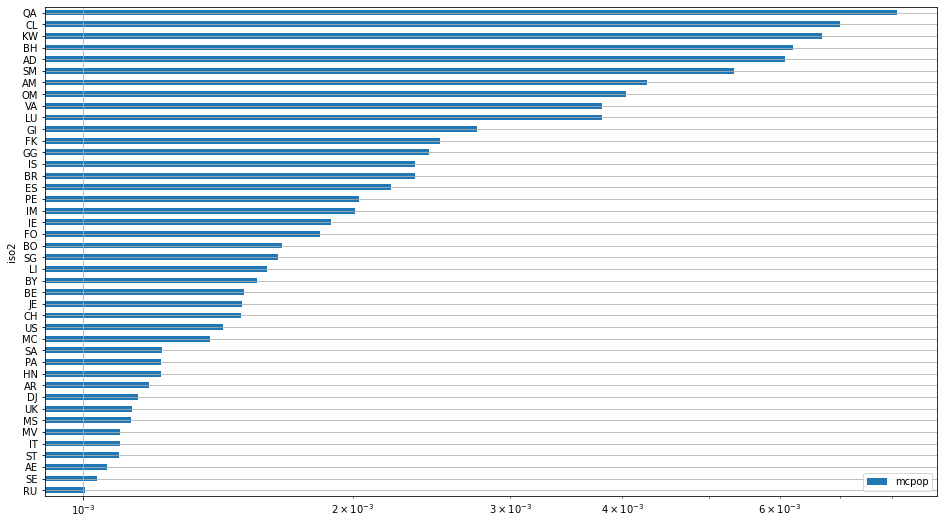

In [23]:
df_prog['mcpop'] = df_prog['maxcur'] / df_prog['popdata']
df_prog[df_prog['mcpop'] > 1/1000].sort_values(by=['mcpop']).plot(
    x='iso2', y='mcpop', kind='barh', logx=True, figsize=(16, 9), grid=True)

The log of infected seems a good initial measure, so we define it as target.

In [24]:
df_prog['target'] = np.log10(df_prog['mcpop'])
df_prog['target'].describe()

count    190.000000
mean      -3.678741
std        0.706971
min       -5.061996
25%       -4.263067
50%       -3.748634
75%       -3.144290
max       -2.091463
Name: target, dtype: float64

For looking at country behavior we try the ACAPS government measures dataset.

In [25]:
df_meas = pd.read_excel('acaps_covid19_government_measures_dataset.xlsx', sheet_name='Database', parse_dates=[12, 16])
df_meas

ID      COUNTRY  ISO ADMIN_LEVEL_NAME  PCODE  REGION  \
0          1  Afghanistan  AFG              NaN    NaN    Asia   
1          2  Afghanistan  AFG            Kabul    NaN    Asia   
2          3  Afghanistan  AFG              NaN    NaN    Asia   
3          4  Afghanistan  AFG              NaN    NaN    Asia   
4          5  Afghanistan  AFG              NaN    NaN    Asia   
...      ...          ...  ...              ...    ...     ...   
16795  13722     Zimbabwe  ZWE              NaN    NaN  Africa   
16796  13723     Zimbabwe  ZWE              NaN    NaN  Africa   
16797  13724     Zimbabwe  ZWE              NaN    NaN  Africa   
16798  14734     Zimbabwe  ZWE              NaN    NaN  Africa   
16799  14735     Zimbabwe  ZWE              NaN    NaN  Africa   

                                   LOG_TYPE  \
0      Introduction / extension of measures   
1      Introduction / extension of measures   
2      Introduction / extension of measures   
3      Introduction / extension of measures   
4      Introduction / extension of measures   
...                                     ...   
16795  Introduction / extension of measures   
16796                     Phase-out measure   
16797  Introduction / extension of measures   
16798                     Phase-out measure   
16799                     Phase-out measure   

                                     CATEGORY  \
0                      Public health measures   
1                      Public health measures   
2                      Public health measures   
3      Governance and socio-economic measures   
4                           Social distancing   
...                                       ...   
16795                   Movement restrictions   
16796                       Social distancing   
16797                   Movement restrictions   
16798                       Social distancing   
16799                       Social distancing   

                                                 MEASURE TARGETED_POP_GROUP  \
0      Health screenings in airports and border cross...                 No   
1                      Isolation and quarantine policies                 No   
2                                    Awareness campaigns                 No   
3      Emergency administrative structures activated ...                 No   
4                                Limit public gatherings                 No   
...                                                  ...                ...   
16795                        Surveillance and monitoring                 No   
16796                                   Schools closure                  No   
16797                        Surveillance and monitoring                Yes   
16798          Closure of businesses and public services                Yes   
16799          Closure of businesses and public services                Yes   

                                                COMMENTS  NON_COMPLIANCE  \
0                                                    NaN             NaN   
1                                                    NaN             NaN   
2                                                    NaN             NaN   
3                                                    NaN             NaN   
4                              Nevruz festival cancelled             NaN   
...                                                  ...             ...   
16795  Everyone transiting through Zimbabwe should ha...   Not available   
16796  the re-opening of schools be moved from the pr...  Not applicable   
16797  Identification/travel documents of returness w...   Not available   
16798  Restaurants now allowed to serve sit-in meals ...  Not applicable   
16799  Safari Operators for local hunting only and Na...  Not applicable   

      DATE_IMPLEMENTED                   SOURCE   SOURCE_TYPE  \
0           2020-02-12       Ministry of Health    Government   
1           2020-02-12       Ministry of Health    Government   
2     

The dataset contains both start and end of measures, so let's see how they are coded.

In [26]:
print(df_meas['LOG_TYPE'].unique())
df_meas = df_meas[df_meas['LOG_TYPE'] == 'Introduction / extension of measures']

['Introduction / extension of measures' 'Phase-out measure']


Both datasets contain the three character ISO country code, so we join on those columns.

In [27]:
df_full = pd.merge(df_prog, df_meas, left_on='iso3', right_on='ISO')
df_full

iso2                 cname iso3   ccont     popdata  rsquared  progress  \
0       AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.997174  0.819035   
1       AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.997174  0.819035   
2       AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.997174  0.819035   
3       AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.997174  0.819035   
4       AE  United_Arab_Emirates  ARE    Asia   9770526.0  0.997174  0.819035   
...    ...                   ...  ...     ...         ...       ...       ...   
12032   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.922049  1.452376   
12033   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.922049  1.452376   
12034   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.922049  1.452376   
12035   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.922049  1.452376   
12036   ZW              Zimbabwe  ZWE  Africa  14645473.0  0.922049  1.452376   

              final      start       peak  ...  \
0      56723.700058 2020-03-22 2020-05-16  ...   
1      56723.700058 2020-03-22 2020-05-16  ...   
2      56723.700058 2020-03-22 2020-05-16  ...   
3      56723.700058 2020-03-22 2020-05-16  ...   
4      56723.700058 2020-03-22 2020-05-16  ...   
...             ...        ...        ...  ...   
12032    373.870217        NaT 2020-06-11  ...   
12033    373.870217        NaT 2020-06-11  ...   
12034    373.870217        NaT 2020-06-11  ...   
12035    373.870217        NaT 2020-06-11  ...   
12036    373.870217        NaT 2020-06-11  ...   

                                                 MEASURE  TARGETED_POP_GROUP  \
0                                      Visa restrictions                 Yes   
1                                      Visa restrictions                  No   
2                       International flights suspension                 Yes   
3      Health screenings in airports and border cross...                 Yes   
4      Health screenings in airports and border cross...                  No   
...                                                  ...                 ...   
12032                                   Partial lockdown                  No   
12033      Requirement to wear protective gear in public                  No   
12034                                   Partial lockdown                  No   
12035                        Surveillance and monitoring                  No   
12036                        Surveillance and monitoring                 Yes   

                                                COMMENTS    NON_COMPLIANCE  \
0      entry ban for travellers from Iran (no governm...               NaN   
1          suspension of visa issuance starting March 17               NaN   
2      flights to and from Iran and China are suspend...               NaN   
3      passengers arriving from China will undergo he...               NaN   
4           health sreenings for all passengers arriving               NaN   
...                                                  ...               ...   
12032  Partial lockdown (level 2) extended indefinite...     Not available   
12033  The government of Zimbabwe has officially made...  Arrest/Detention   
12034           Zimbabwe extends lockdown until May 15th     Not available   
12035  Everyone transiting through Zimbabwe should ha...     Not available   
12036  Identification/travel documents of returness w...     Not available   

       DATE_IMPLEMENTED                       SOURCE   SOURCE_TYPE  \
0            2020-01-02                      Reuters         Media   
1            2020-03-17                          NYT         Media   
2            2020-03-17  Ministry of Foreign Affairs    Government   
3            2020-01-23                 KhaleejTimes         Media   
4            2020-03-08                   US Embassy    Government   
...                 ...                          ...           ...   
12032        2020-05-17          Zimbabwe Go

The first analysis could be how early measures were implemented, so we calculate the difference between the implemented date and our estimated start date in days.

In [28]:
df_full['days'] = (df_full['DATE_IMPLEMENTED'] - df_full['start']).dt.days
df_full['days'].describe()

count    11636.000000
mean        27.224476
std         51.226682
min       -132.000000
25%         -5.000000
50%         20.000000
75%         59.000000
max        246.000000
Name: days, dtype: float64

To reduce this to a source dataset for modeling, we filter on introduction of measures and pivot to columns with the average number of days for categories, indexed by country code.

In [29]:
df_aggr = df_full.pivot_table(index='iso2', columns='CATEGORY', values='days')
df_aggr

CATEGORY  Governance and socio-economic measures  Humanitarian exemption  \
iso2                                                                       
AE                                      2.000000                     NaN   
AF                                    -53.800000                     NaN   
AG                                     36.428571                     NaN   
AL                                     13.733333                     NaN   
AM                                     65.571429                     NaN   
...                                          ...                     ...   
UZ                                           NaN                     NaN   
VC                                    103.600000                     NaN   
VE                                    -15.416667                     NaN   
YE                                    -33.333333                     NaN   
ZM                                    -35.000000                     NaN   

CATEGORY  Lockdown  Movement restrictions  Public health measures  \
iso2                                                                
AE            14.5              32.222222               16.083333   
AF           -21.0             -53.375000              -40.058824   
AG            54.6              85.636364               77.318182   
AL            28.5              31.714286                3.000000   
AM            27.0              32.250000               39.454545   
...            ...                    ...                     ...   
UZ            86.5              48.500000               80.200000   
VC             NaN             100.000000               38.333333   
VE            18.0             -15.285714                5.125000   
YE           -43.5             -69.142857              -55.000000   
ZM             NaN             -30.166667              -41.636364   

CATEGORY  Social distancing  
iso2                         
AE                17.500000  
AF               -35.333333  
AG                46.153846  
AL                 7.125000  
AM                50.833333  
...                     ...  
UZ               103.000000  
VC                -5.000000  
VE                10.571429  
YE               -81.333333  
ZM               -47.833333  

[158 rows x 6 columns]

The final dataset contains this data combined with our estimates.

In [30]:
df_final = pd.merge(df_prog, df_aggr, left_on='iso2', right_index=True)
df_final.reset_index(drop=True, inplace=True)
df_final

iso2                             cname iso3    ccont     popdata  \
0     AE              United_Arab_Emirates  ARE     Asia   9770526.0   
1     AF                       Afghanistan  AFG     Asia  38041757.0   
2     AG               Antigua_and_Barbuda  ATG  America     97115.0   
3     AL                           Albania  ALB   Europe   2862427.0   
4     AM                           Armenia  ARM   Europe   2957728.0   
..   ...                               ...  ...      ...         ...   
153   UZ                        Uzbekistan  UZB     Asia  32981715.0   
154   VC  Saint_Vincent_and_the_Grenadines  VCT  America    110593.0   
155   VE                         Venezuela  VEN  America  28515829.0   
156   YE                             Yemen  YEM     Asia  29161922.0   
157   ZM                            Zambia  ZMB   Africa  17861034.0   

     rsquared  progress          final      start       peak  ...          mu  \
0    0.997174  0.819035   56723.700058 2020-03-22 2020-05-16  ...  136.821258   
1    0.997526  0.395702   75966.289808 2020-04-18 2020-06-24  ...  175.763193   
2    0.703041  0.798111      65.407967 2020-02-24 2020-05-15  ...  136.180986   
3    0.943907  0.655842    3322.494016 2020-03-10 2020-06-01  ...  152.514337   
4    0.983311  0.113427  197160.728365 2020-03-08 2020-09-04  ...  248.141385   
..        ...       ...            ...        ...        ...  ...         ...   
153  0.938510  0.641006   11275.726873 2020-04-14 2020-06-07  ...  158.651749   
154  0.918896  0.894841      31.290463 2020-03-23 2020-04-29  ...  119.544483   
155  0.981685  0.951952    3987.145156 2020-05-20 2020-06-07  ...  159.444172   
156  0.980176  1.499994     700.383533 2020-06-15 2020-06-19  ...  171.212991   
157  0.949450  1.241903    1207.593610 2020-05-09 2020-05-20  ...  141.327507   

           maxcur     mcpop    target  Governance and socio-economic measures  \
0    10378.580944  0.001062 -2.973780                                2.000000   
1    10022.097688  0.000263 -3.579302                              -53.800000   
2        5.367933  0.000055 -4.257479                               36.428571   
3      314.466987  0.000110 -3.959159                               13.733333   
4    12615.110569  0.004265 -2.370067                               65.571429   
..            ...       ...       ...                                     ...   
153   1209.131454  0.000037 -4.435800                                     NaN   
154      5.482225  0.000050 -4.304771                              103.600000   
155   1340.014829  0.000047 -4.327976                              -15.416667   
156    535.739649  0.000018 -4.735862                              -33.333333   
157    522.131591  0.000029 -4.534127                              -35.000000   

     Humanitarian exemption  Lockdown  Movement restrictions  \
0                       NaN      14.5              32.222222   
1                       NaN     -21.0             -53.375000   
2                       NaN      54.6              85.636364   
3                       NaN      28.5              31.714286   
4                       NaN      27.0              32.250000   
..                      ...       ...                    ...   
153                     NaN      86.5              48.500000   
154                     NaN       NaN             100.000000   
155                     NaN      18.0             -15.285714   
156                     NaN     -43.5             -69.142857   
157                     NaN       NaN             -30.166667   

     Public health measures  Social distancing  
0                 16.083333          17.500000  
1                -40.058824         -35.333333  
2                 77.318182          46.153846  
3                  3.000000           7.125000  
4                 39.454545          50.833333  
..                      ...                ...  
153               80.200000         103.000000  
154               38.333333     

Just a quick check on data, for example the relation between beta (the Gumbel curve width parameter) and the target column.

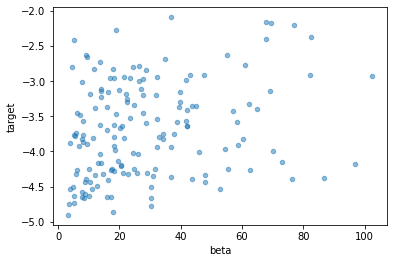

In [31]:
df_final.plot(kind="scatter", x="beta", y="target", alpha=1/2)

If we start using this model for predictions, we need to split the dataset. For now we are still exploring so we use all the data for analysis. The feature columns are all the columns added to the right of our dataset with estimations.

In [32]:
from sklearn.model_selection import train_test_split

featcols = len(df_prog.columns)
features = df_final.columns[featcols:]

#x_trn, x_tst, y_trn, y_tst = train_test_split(df_final[features], df_final['mcpop'])

x_trn = df_final[features]
y_trn = df_final['target']

Create the XGBoost data structure for training and check parameters to prevent overfitting on this small dataset. Then check the error rate between the test and train data used internally by XGBoost. If the test error rate is much higher, we are overfitting.

[0]	train-rmse:3.83225+0.01462	test-rmse:3.83069+0.15063
[10]	train-rmse:1.46559+0.00535	test-rmse:1.47004+0.13185
[20]	train-rmse:0.73522+0.01025	test-rmse:0.76423+0.08926
[30]	train-rmse:0.57361+0.01282	test-rmse:0.62082+0.07443
[40]	train-rmse:0.54329+0.01221	test-rmse:0.59646+0.07980
[50]	train-rmse:0.53534+0.01144	test-rmse:0.59125+0.08207
[60]	train-rmse:0.53192+0.01133	test-rmse:0.59341+0.08390
[70]	train-rmse:0.52754+0.01122	test-rmse:0.59149+0.08528
[80]	train-rmse:0.52535+0.01186	test-rmse:0.59094+0.08559
[90]	train-rmse:0.52256+0.01074	test-rmse:0.59491+0.08880
[99]	train-rmse:0.52010+0.01013	test-rmse:0.59308+0.08862


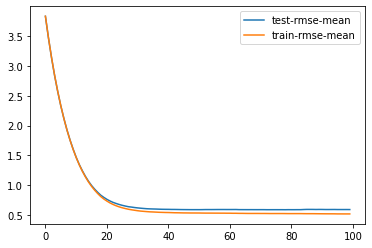

In [33]:
import xgboost as xgb

dtrn = xgb.DMatrix(x_trn, label=y_trn)
#dtst = xgb.DMatrix(x_tst)

params = {
    #'objective':'reg:squarederror',
    'eta':1/10,
    'gamma':3,
    #'min_child_weight':10,
    #'tree_method':'hist',
    #'seed':0,
    #'max_depth':3,
    'colsample_bytree':0.7,
    'subsample':0.7,
}

hist = xgb.cv(params, dtrn, nfold=10, as_pandas=True, num_boost_round=100, verbose_eval=10, early_stopping_rounds=1000, show_stdv=True, seed=0)
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

Train the model using the parameters found above and show the feature importance. Note that this can be both a positive and negative influence.

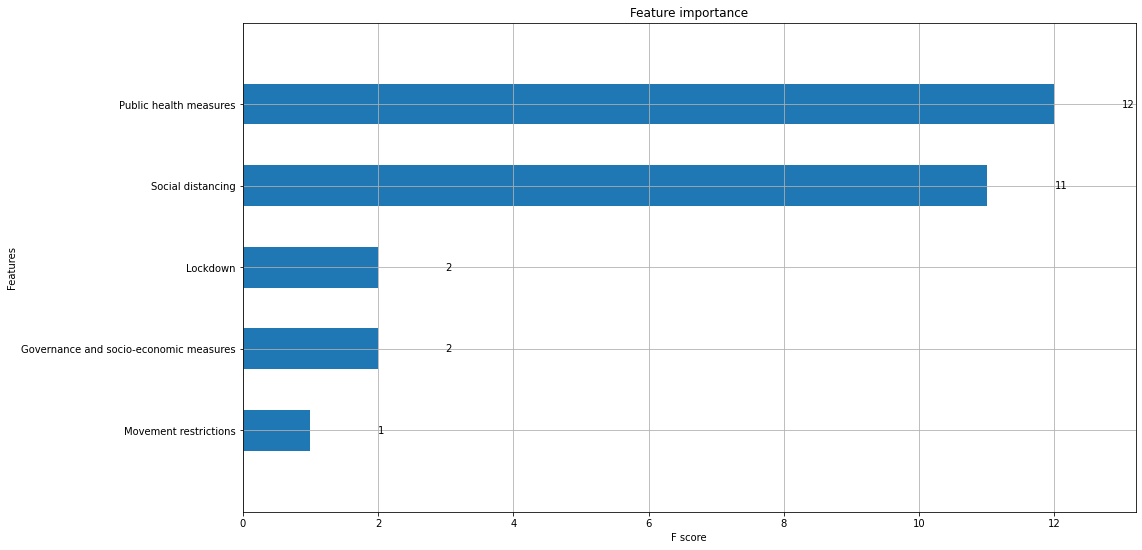

In [34]:
bst = xgb.train(params, dtrn, num_boost_round=100, verbose_eval=1)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

xgb.plot_importance(bst, ax=ax, height=1/2)

The actual XGBoost model is an ensemble of decision trees that can be hard to interpret. SHAP is an analysis library that shows the influence of factors based on this model. First we choose a country and see how the estimate relates to measures.

In [39]:
country = 'TG'

rownum = df_final[df_final['iso2'] == country].index[0]

import shap

shap.initjs()

explainer = shap.TreeExplainer(bst, x_trn)
shap_values = explainer.shap_values(x_trn)

shap.force_plot(explainer.expected_value, shap_values[rownum], x_trn.loc[rownum])

When we take all these plots, rotate and stack them we get a global view of the model.

In [36]:
shap.force_plot(explainer.expected_value, shap_values, x_trn)

Looking at individual measures we can visualize their impact on model output.

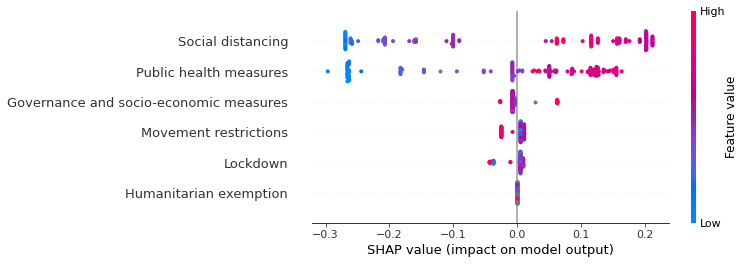

In [37]:
shap.summary_plot(shap_values, x_trn)

Finally, a similar plot to the importance plot above shows the explanatory value of measures.

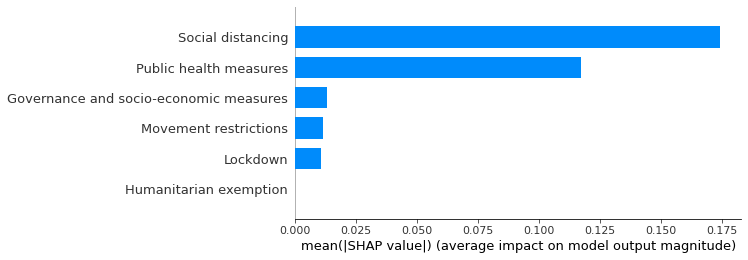

In [38]:
shap.summary_plot(shap_values, x_trn, plot_type="bar")

Keep exploring! Stay home, wash your hands, keep your distance.